# Project 1 : 게임 데이터 분석 및 데이터 인사이트

## 데이터 전처리

### 라이브러리 추가 및 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Code States/Section 1/Project/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


### 결측치 제거 및 인덱스 초기화

In [5]:
df.drop(df.columns[0], axis = 1, inplace = True) # 1열 제거
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
df.isna().sum() # 결측치 확인

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df.dropna(inplace = True) # 결측치 제거
df.isna().sum() # 결측치 잘 제거 되었나 확인

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [8]:
df.reset_index(drop = True, inplace = True) # 인덱스 초기화
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


### 데이터 타입 변경

In [9]:
df.dtypes # data type 확인

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [10]:
df.NA_Sales.value_counts() # NA_Sales column의 데이터 확인, 숫자형으로 전환하기 위해 M, K의 변환이 필요해보임

0       4367
0.02     524
0.03     518
0.01     516
0.04     515
        ... 
2.84       1
2.35       1
5.84       1
4.76       1
4.52       1
Name: NA_Sales, Length: 489, dtype: int64

In [11]:
df[df.NA_Sales.str.contains('K')] # K를 포함하고 있는 데이터 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001.0,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006.0,Racing,Codemasters,0K,0.02,0,0
866,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009.0,Strategy,Aqua Plus,0K,0,0.04,0
1071,Pro Evolution Soccer 2014,3DS,2013.0,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15308,Championship Manager 2010,PC,2009.0,Sports,Eidos Interactive,0K,0.01,0,0
15846,Vin Diesel: Wheelman,PS3,2009.0,Racing,Ubisoft,120K,0.15,0,0.06
15978,Midway Arcade Treasures,PS2,2003.0,Misc,Midway Games,720K,0.56,0,0.19
16137,Mortal Kombat,PSV,2012.0,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [12]:
df[df.NA_Sales.str.contains('M')] # M을 포함하고 있는 데이터 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
439,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,0.58M,0.47,0.01,0.1
450,F1 2010,PS3,2010.0,Racing,Codemasters,0.25M,0.76,0.08,0.27
568,Mario Kart 64,N64,1996.0,Racing,Nintendo,5.55M,1.94,2.23,0.15
616,The Hobbit,GBA,2003.0,Platform,Vivendi Games,0.14M,0.05,0,0
663,Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,LucasArts,1.23M,0.3,0,0.14
...,...,...,...,...,...,...,...,...,...
15642,Juiced 2: Hot Import Nights,PC,2007.0,Racing,THQ,0M,0.01,0,0
15804,Taiko no Tatsujin Wii,Wii,2008.0,Misc,Namco Bandai Games,0M,0,0.67,0
15821,Medal of Honor: Airborne,X360,2007.0,Shooter,Electronic Arts,0.45M,0.53,0.01,0.12
16056,NASCAR 06: Total Team Control,PS2,2005.0,Racing,Electronic Arts,0.53M,0.02,0,0.09


In [13]:
# 데이터 확인시 Sales들의 단위는 백만으로 확인, K는 /1000을 해주고, M은 M을 제거하여 단위를 통일이후 numeric type으로 변경

def change_unit(x):
  str = x
  if 'K' in str:
    return float(str.replace('K', '')) / 1000
  elif 'M' in str:
    return float(str.replace('M', ''))
  else:
    return float(str)

df['NA_Sales'] = df['NA_Sales'].apply(change_unit)
df['EU_Sales'] = df['EU_Sales'].apply(change_unit)
df['JP_Sales'] = df['JP_Sales'].apply(change_unit)
df['Other_Sales'] = df['Other_Sales'].apply(change_unit)

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [14]:
df.dtypes # 잘 변환되었는지 확인

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

### 이상치 확인 및 변경

In [15]:
df.Year.value_counts().tail(10) # 연도별 카운터
#2000년대는 2000을 더해줘야 할 것 같고, 8~90년대는 1900을 더해줘야 할 것 같이 판단

7.0       3
2017.0    3
14.0      2
13.0      2
1.0       2
12.0      2
97.0      2
94.0      1
2020.0    1
86.0      1
Name: Year, dtype: int64

In [16]:
def change_year(x): # 부족한 년도를 고쳐줄 함수 정의
  if x <= 20: # 2000년대 value에는 2000을 더함
    return int(x + 2000)
  elif x < 100: # 1900년대 value에는 1900을 더함
    return int(x + 1900)
  else: # 나머지는 그대로
    return int(x)

df['Year'] = df['Year'].apply(change_year)

In [17]:
df.Year.value_counts().tail() # 연도 수정이 잘 되었는지 확인

1985    14
1984    14
1980     8
2017     3
2020     1
Name: Year, dtype: int64

### 컬럼 추가

In [18]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


## 데이터 분석

### 지역에 따라서 선호하는 게임 장르

In [19]:
df_area_genre = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() # 장르에 따른 지역별 판매량 합계를 봄
df_area_genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45


In [20]:
df_area_genre.reset_index(inplace = True)
df_area_genre.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45


In [21]:
df_m = pd.melt(df_area_genre, id_vars = 'Genre')
df_m['Area'] = df_m.variable.str.split('_').str[0]
df_m.drop('variable', axis = 1, inplace = True)
df_m.head()

,Genre,value,Area
0,Action,858.75,NA
1,Adventure,101.79,NA
2,Fighting,220.35,NA
3,Misc,394.73,NA
4,Platform,445.38,NA


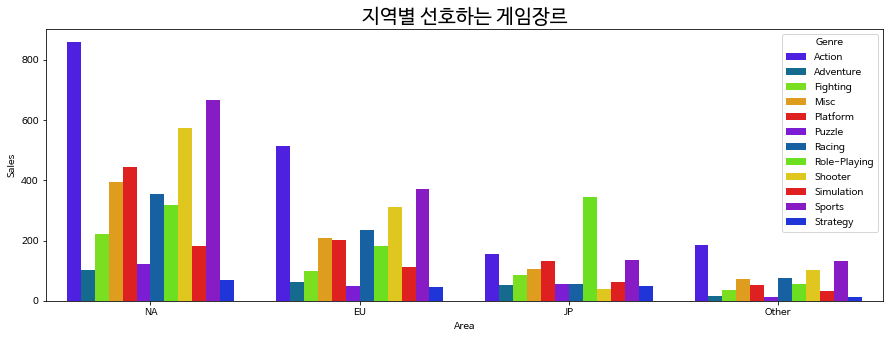

In [22]:
plt.figure(figsize = (15,5))

plt.title('지역별 선호하는 게임장르', fontsize = 20)
pal = sns.color_palette('prism', 12)
sns.barplot(data = df_m, x = 'Area', y = 'value', hue = 'Genre', palette = pal);
plt.ylabel('Sales');

### 연도별 게임 트랜드

#### 연도별 출시량

In [23]:
df_year = df.Year.value_counts().reset_index()
df_year = df_year.rename(columns = {'Year' : 'Quantity', 'index' : 'Year'})
df_year = df_year.sort_values('Year').reset_index(drop = True)
df_year.head()

,Year,Quantity
0,1980,8
1,1981,46
2,1982,36
3,1983,17
4,1984,14


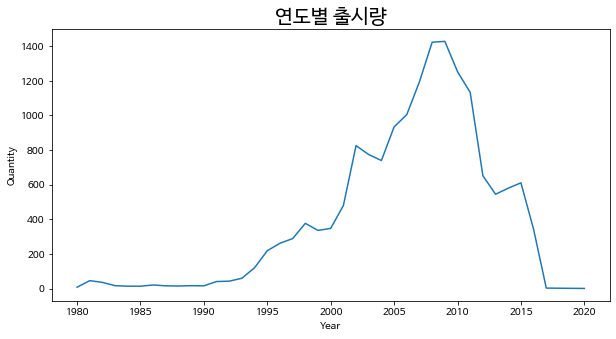

In [24]:
plt.figure(figsize = (10, 5))
plt.title('연도별 출시량', fontsize = 20)
sns.lineplot(data = df_year, x = 'Year', y = 'Quantity');

#### 연도별 판매량

In [25]:
df_sales = df.groupby(['Year'])['Total_Sales'].sum()
df_sales = df_sales.reset_index()
df_sales.head()

,Year,Total_Sales
0,1980,10.88
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35


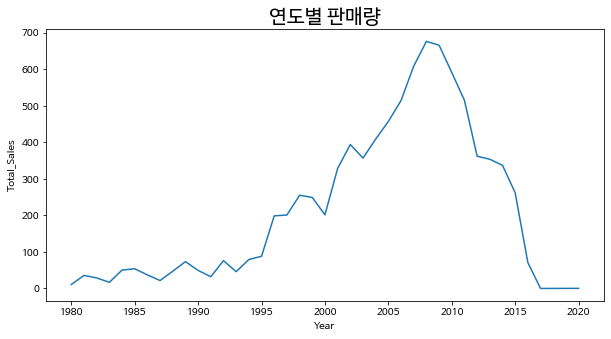

In [26]:
plt.figure(figsize = (10, 5))
plt.title('연도별 판매량', fontsize = 20)
sns.lineplot(data = df_sales, x = 'Year', y = 'Total_Sales');

#### 연도별 장르 트랜드

In [27]:
df_year_genre = df.groupby(['Year', 'Genre'])['Total_Sales'].sum()

df_year_genre = df_year_genre.reset_index()
df_year_genre.head()

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Shooter,7.07
4,1981,Action,14.79


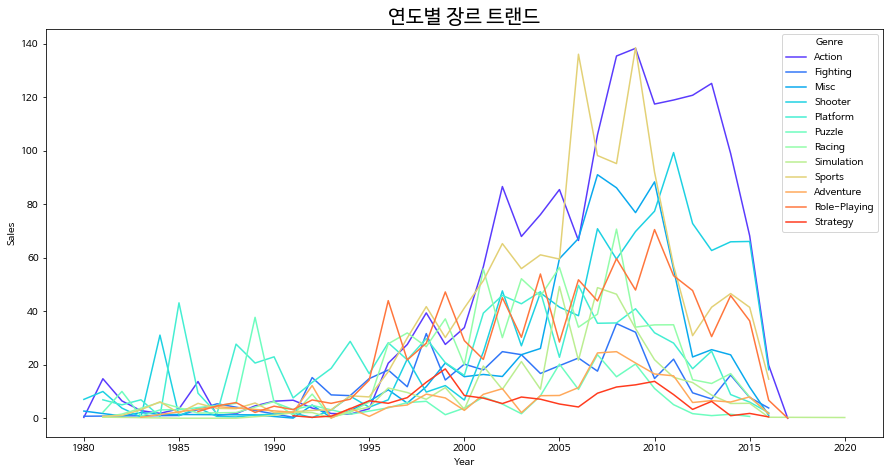

In [28]:
plt.figure(figsize = (15, 7.5))
pal2 = sns.color_palette('rainbow', 12)
plt.title('연도별 장르 트랜드', fontsize = 20)
sns.lineplot(data = df_year_genre, x = 'Year', y = 'Total_Sales', hue = 'Genre', palette = pal2);
plt.ylabel('Sales');

#### 연도별 가장 많은 판매량을 기록한 플랫폼의 판매량

In [29]:
df_year_platform = df.groupby(['Year', 'Platform'])['Total_Sales'].sum()
df_year_platform = df_year_platform.reset_index()
df_year_platform = df_year_platform[df_year_platform['Total_Sales'] == df_year_platform.groupby(['Year'])['Total_Sales'].transform(max)] # 연도별 플랫폼 중 가장 큰 값을 가지는 데이터만 필터링
df_year_platform.head()

,Year,Platform,Total_Sales
0,1980,2600,10.88
1,1981,2600,35.68
2,1982,2600,28.88
4,1983,NES,10.96
6,1984,NES,50.08


In [30]:
len(df_year_platform.Platform.value_counts())

11

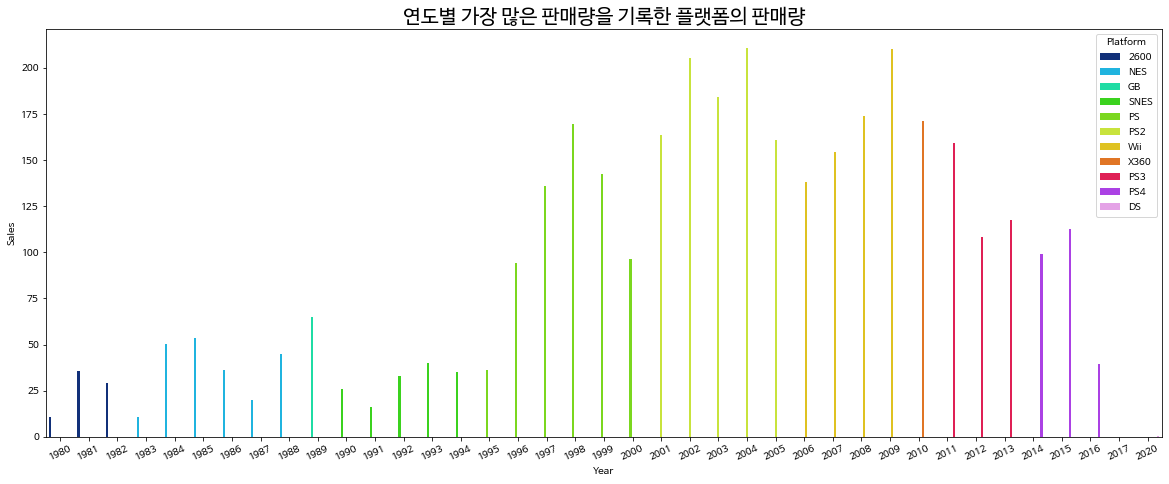

In [31]:
plt.figure(figsize = (20, 7.5))
plt.title('연도별 가장 많은 판매량을 기록한 플랫폼의 판매량', fontsize = 20)
sns.barplot(data = df_year_platform, x = 'Year', y = 'Total_Sales', hue = 'Platform', palette = sns.color_palette('gist_ncar',11)).tick_params(axis = 'x', rotation = 25);
plt.ylabel('Sales');

### 출고량이 높은 게임에 대한 분석

#### Top 100위 게임에 대한 분석

In [32]:
df2 = df.sort_values('Total_Sales', ascending = False)
df2.reset_index(drop = True, inplace = True)
df2.drop(df2.index[100:], inplace = True)
df2.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
95,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
96,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.38
97,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
98,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.29


#### Top 100위 게임 플랫폼별 점유율

In [33]:
df_p = df2.loc[:,['Platform', 'Total_Sales']] # 필요한 데이터만 선택
df_p

,Platform,Total_Sales
0,Wii,82.74
1,NES,40.24
2,Wii,35.83
3,Wii,33.00
4,GB,31.38
...,...,...
95,3DS,7.44
96,X360,7.38
97,X360,7.34
98,Wii,7.32


In [34]:
df_p_sum = df_p.groupby(df_p['Platform']).sum() # 플랫폼에 판매량 합계를 보기
df_p_sum.head()

,Total_Sales
Platform,
2600,7.81
3DS,60.70
DS,207.18
GB,128.69
GBA,26.33


In [35]:
df_p_sum['share(%)'] = ((df_p_sum['Total_Sales'] / df_p_sum['Total_Sales'].sum()) * 100).round(2) # share column을 추가하여 점유율 보기
df_p_sum.head()

,Total_Sales,share(%)
Platform,,
2600,7.81,0.54
3DS,60.70,4.18
DS,207.18,14.25
GB,128.69,8.85
GBA,26.33,1.81


In [36]:
df_p_sum_sort = df_p_sum.sort_values(by = df_p_sum.columns[1], ascending = False) # 점유율을 내림차순으로 정렬
df_p_sum_sort.drop('Total_Sales', axis = 1, inplace = True)
df_p_sum_sort.head()

,share(%)
Platform,
Wii,22.68
DS,14.25
X360,13.07
GB,8.85
PS3,7.67


In [37]:
others_sum = df_p_sum_sort.iloc[8:,[0]].sum() # 점유율이 4% 미만인 플랫폼들을 Others 하나로 합침
idx_drop = df_p_sum_sort[df_p_sum_sort['share(%)'] < 4].index
df_p_sum_sort.drop(idx_drop, inplace = True)
df_p_sum_sort.loc['Others'] = others_sum
df_p_sum_sort.head()

,share(%)
Platform,
Wii,22.68
DS,14.25
X360,13.07
GB,8.85
PS3,7.67


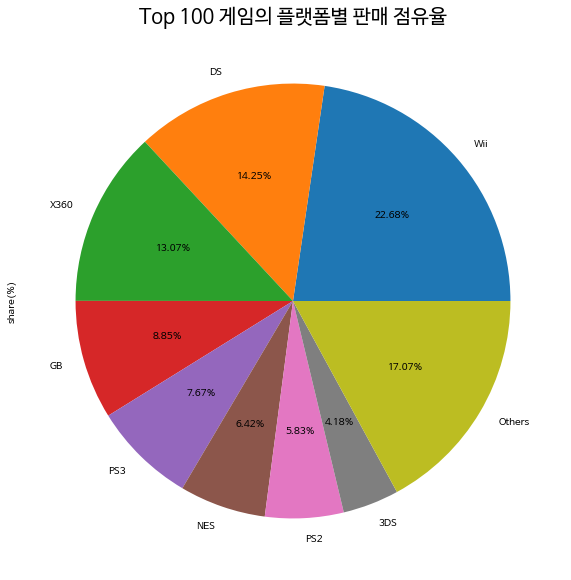

In [38]:
plt.figure(figsize = (10, 10))
plt.title('Top 100 게임의 플랫폼별 판매 점유율', fontsize = 20)
df_p_sum_sort['share(%)'].plot(kind = 'pie', autopct = '%1.2f%%');

#### Top 100위 게임의 장르별 판매량

In [39]:
df2_genre = df2.groupby(['Genre'])['Total_Sales'].sum() # 장르별로 판매량을 집계
df2_genre = df2_genre.reset_index()
df2_genre = df2_genre.sort_values('Total_Sales', ascending = False) # 내림차순으로 정렬
df2_genre.head()

,Genre,Total_Sales
8,Shooter,264.88
4,Platform,251.94
7,Role-Playing,191.08
10,Sports,177.00
0,Action,164.22


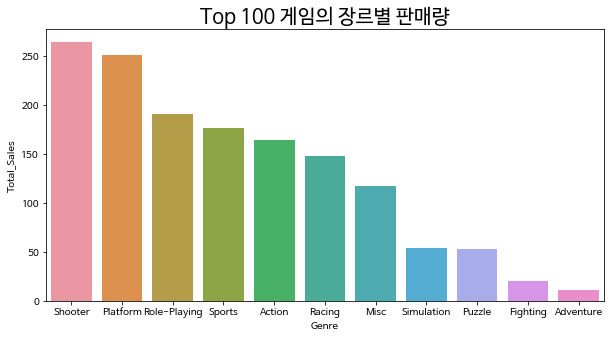

In [40]:
plt.figure(figsize = (10, 5))
plt.title('Top 100 게임의 장르별 판매량', fontsize = 20)
sns.barplot(data = df2_genre, x = 'Genre', y = 'Total_Sales');

### 판매량이 많은 회사에 대한 분석

#### 지역별 판매량 TOP5 Publisher

In [41]:
df_publisher = df.groupby(['Publisher'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() # Publisher별로 각각 지역에 대한 총 판매량을 집계
df_publisher_NA = df_publisher.sort_values('NA_Sales', ascending = False).head() # 각 지역의 판매량을 기준으로 내림차순 정렬
df_publisher_EU = df_publisher.sort_values('EU_Sales', ascending = False).head()
df_publisher_JP = df_publisher.sort_values('JP_Sales', ascending = False).head()
df_publisher_Other = df_publisher.sort_values('Other_Sales', ascending = False).head()
df_publisher_NA.reset_index(inplace= True)
df_publisher_EU.reset_index(inplace= True)
df_publisher_JP.reset_index(inplace= True)
df_publisher_Other.reset_index(inplace= True)
df_publisher_NA = df_publisher_NA.drop(['EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1) # 각각 판매량을 분리
df_publisher_EU = df_publisher_EU.drop(['NA_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)
df_publisher_JP = df_publisher_JP.drop(['NA_Sales', 'EU_Sales', 'Other_Sales'], axis = 1)
df_publisher_Other = df_publisher_Other.drop(['NA_Sales', 'EU_Sales', 'JP_Sales'], axis = 1)

In [42]:
df_publisher_NA

,Publisher,NA_Sales
0,Nintendo,808.14
1,Electronic Arts,579.90
2,Activision,425.10
3,Sony Computer Entertainment,263.70
4,Ubisoft,252.26


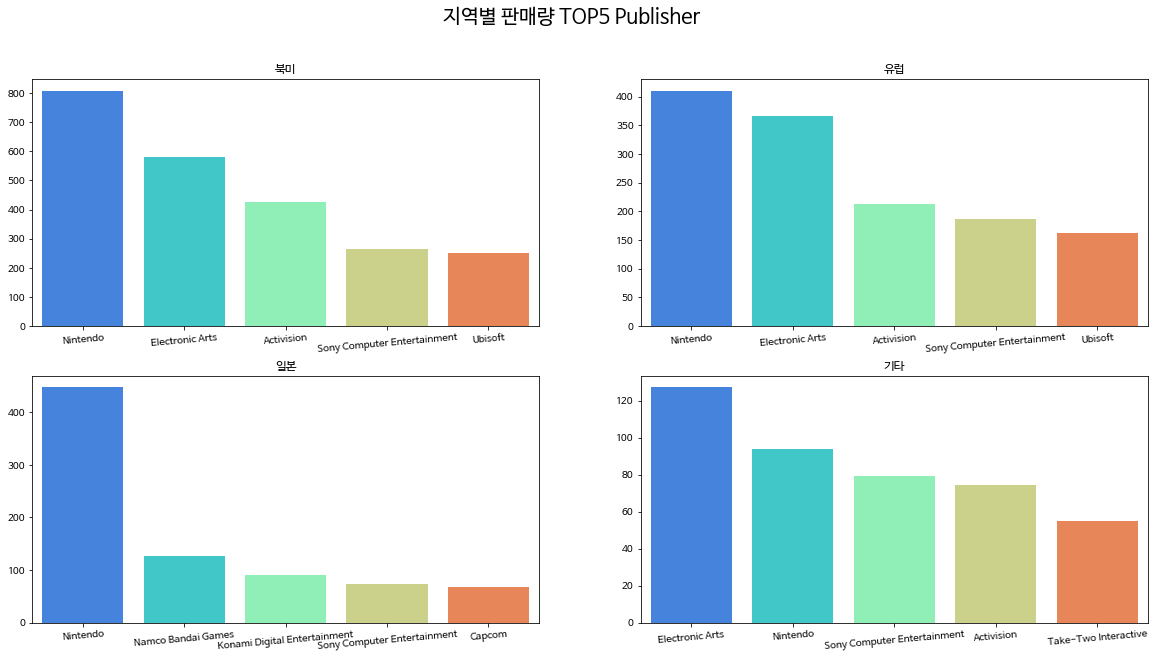

In [43]:
f, axes = plt.subplots(2, 2, figsize = (20, 10))
f.suptitle('지역별 판매량 TOP5 Publisher', fontsize = 20)
n = sns.barplot(data = df_publisher_NA, x = 'Publisher', y = 'NA_Sales', ax = axes[0, 0], palette = sns.color_palette('rainbow', 5));
n.tick_params(axis = 'x', rotation = 5)
n.set(title = '북미', xlabel = None, ylabel = None)
e = sns.barplot(data = df_publisher_EU, x = 'Publisher', y = 'EU_Sales', ax = axes[0, 1], palette = sns.color_palette('rainbow', 5));
e.tick_params(axis = 'x', rotation = 5)
e.set(title = '유럽', xlabel = None, ylabel = None)
j = sns.barplot(data = df_publisher_JP, x = 'Publisher', y = 'JP_Sales', ax = axes[1, 0], palette = sns.color_palette('rainbow', 5));
j.tick_params(axis = 'x', rotation = 5)
j.set(title = '일본', xlabel = None, ylabel = None)
o = sns.barplot(data = df_publisher_Other, x = 'Publisher', y = 'Other_Sales', ax = axes[1, 1], palette = sns.color_palette('rainbow', 5));
o.tick_params(axis = 'x', rotation = 5)
o.set(title = '기타', xlabel = None, ylabel = None);


#### 판매량이 높은 회사의 장르에 대한 분석

In [44]:
df_temp = df.groupby(['Genre', 'Publisher'])['Total_Sales'].sum(); # 장르와 Publisher 기준으로 판매량을 집계
df_temp = df_temp.reset_index()
df3 = df_temp.sort_values('Total_Sales', ascending = False) # 내림차순 정렬
df3.head()

,Genre,Publisher,Total_Sales
1589,Sports,Electronic Arts,466.04
803,Platform,Nintendo,426.15
1244,Shooter,Activision,295.20
1190,Role-Playing,Nintendo,270.18
1643,Sports,Nintendo,218.00


In [45]:
df3 = df3[df3.Total_Sales >= 50] # 판매량이 5000만장 이상인 Publisher만 필터링
df3.tail()

,Genre,Publisher,Total_Sales
1104,Role-Playing,Bethesda Softworks,54.15
1186,Role-Playing,Namco Bandai Games,53.79
491,Fighting,Nintendo,53.33
63,Action,Disney Interactive Studios,51.10
1212,Role-Playing,SquareSoft,50.76


In [46]:
df3.reset_index(inplace = True, drop = True) # 인덱스 리셋
len(df3.Publisher.value_counts()) # 몇개의 회사가 5000만장을 넘게 팔았는지 확인

19

In [47]:
df3 = pd.pivot_table(df3, index = 'Publisher', columns = 'Genre', values = 'Total_Sales')
df3 = df3.fillna(0)
df3.head()

Genre,Action,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports
Publisher,,,,,,,,,,
Activision,140.62,0.0,76.43,0.0,0.0,0.0,0.00,295.2,0.0,74.74
Bethesda Softworks,0.00,0.0,0.00,0.0,0.0,0.0,54.15,0.0,0.0,0.00
Capcom,85.11,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
Disney Interactive Studios,51.10,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00
Eidos Interactive,63.30,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00


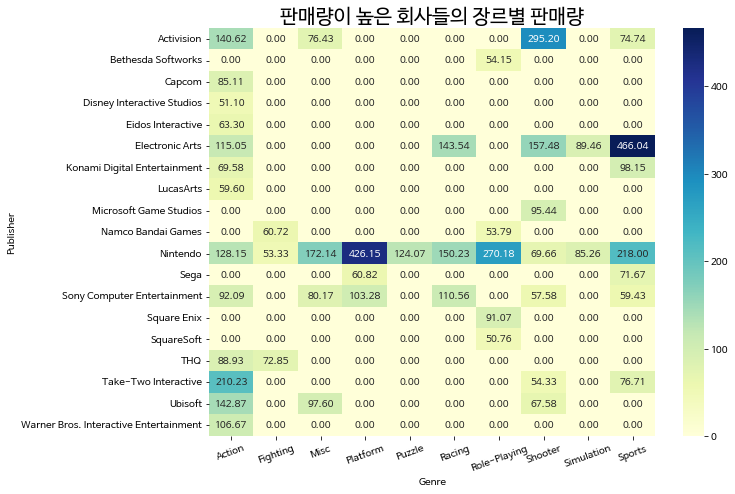

In [48]:
plt.figure(figsize = (10, 7.5))
plt.title('판매량이 높은 회사들의 장르별 판매량', fontsize = 20)                                                                                   
g = sns.heatmap(df3, annot = True, fmt='1.2f', cmap='YlGnBu');
g.tick_params(axis = 'x', rotation = 20)

### 부족한 데이터 보완

#### 플랫폼과 장르와의 상관성

In [49]:
df4 = pd.crosstab(df.Genre, df.Platform)
df4.head()

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action,55,0,180,3,335,6,162,98,3,0,36,13,0,160,0,153,344,369,121,216,141,3,0,12,0,0,229,63,318,152,68
Adventure,1,1,36,11,237,5,35,20,2,0,4,1,0,65,0,66,195,72,19,213,84,26,0,4,1,0,83,3,47,26,11
Fighting,1,0,14,12,36,0,23,42,5,0,29,4,11,5,0,108,146,76,17,73,16,31,0,25,0,0,41,5,64,44,7
Misc,5,0,53,0,388,8,86,35,1,0,17,2,0,22,0,76,217,121,15,104,24,15,2,17,0,0,270,21,122,45,15
Platform,9,0,28,2,89,18,139,73,7,1,30,28,0,11,0,64,101,35,11,35,10,5,1,26,0,0,57,16,24,49,4


In [50]:
chi2_contingency(df4)[1]

0.0

#### 플랫폼별 장르 출시량

In [51]:
df5 = df.groupby(['Platform', 'Genre'])['Total_Sales'].count()
df5 = df5.reset_index()
df5.head()

,Platform,Genre,Total_Sales
0,2600,Action,55
1,2600,Adventure,1
2,2600,Fighting,1
3,2600,Misc,5
4,2600,Platform,9


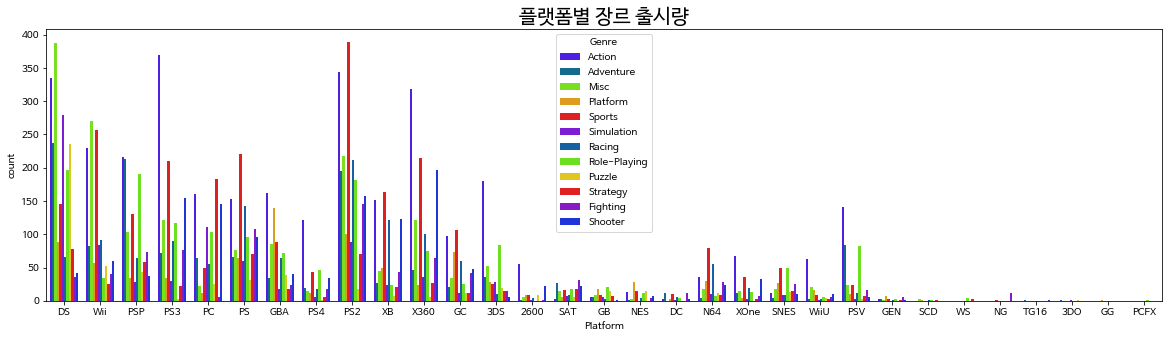

In [52]:
plt.figure(figsize = (20, 5))
plt.title('플랫폼별 장르 출시량', fontsize = 20)
sns.countplot(x = 'Platform', hue = 'Genre', data = df, palette = sns.color_palette('prism', 12));

#### 2010년 이후 플랫폼별 장르 평균 판매액

In [53]:
df6 = df[df['Year'] >= 2010]
df_mean = df6.groupby(['Platform','Genre'])['Total_Sales'].mean()
df_mean = df_mean.reset_index()
df_mean = df_mean.sort_values('Total_Sales', ascending = False)
df_mean = df_mean.reset_index(drop = True)
df_mean = df_mean.rename({'Total_Sales' : 'Avg_Sales'}, axis = 1)
df_mean.head()

,Platform,Genre,Avg_Sales
0,WiiU,Racing,2.593333
1,PS4,Shooter,2.215294
2,XOne,Shooter,1.563333
3,Wii,Platform,1.509000
4,X360,Shooter,1.490185


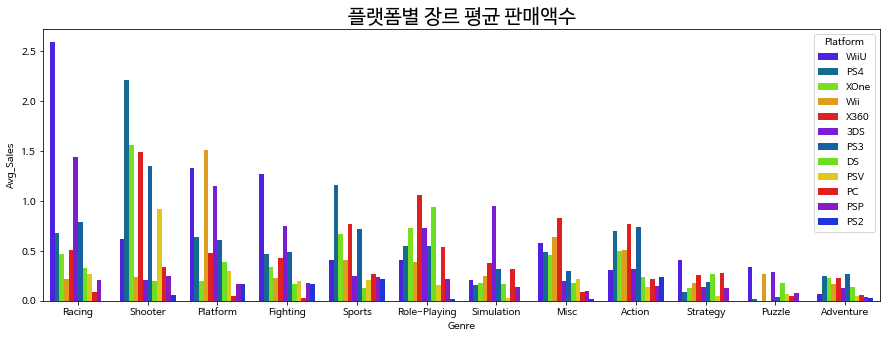

In [54]:
plt.figure(figsize = (15, 5))
plt.title('플랫폼별 장르 평균 판매액수', fontsize = 20)
sns.barplot(data = df_mean, x = 'Genre', y = 'Avg_Sales', hue = 'Platform', palette = sns.color_palette('prism', 12));